# WeatherPy

### Analysis

- My biggest takeaway from the weather data is from the City Latitude vs. Max Temperature plot. Conventional wisdom would suggest that cities along the equator would be the hottest. However, the plot suggests that max temperature actually peaks somewhere in between 10 and 15 degrees north of the equator.


- I would also expect cities near the poles to be the coldest, and this is true. In the plot, it may appear that cities near the north pole are actually significantly colder than those near the south pole. I don't believe this is true. Instead, there is a higher volume of northern cities which skews the appearance of the plot.


- The area highlighted in my first point above also represents another interesting trend. Cities with low humidity are somewhat prevalent outside the 10-15 degrees-north-of-the-equator range (on both sides), but not within that range. This tells me that max temperature and humidity are likely correlated, though asserting that definitively would require more analysis.

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from citipy import citipy
import requests
import time

# Google API Key + Geocoding/Places URLs
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
weather_key = "appid=0d99449d7128437ead7d88097c7ac304&q="

### Generate Cities List

In [2]:
# Get List filled with random unique city names
cities = []
lat =[]
lng = []
countries = []

# Need a way to drop the lat/lng of duplicate cities

for x in range(0, 1500):
    latitude = random.uniform(-90,90)
    longitude = random.uniform(-180,180)
    if (citipy.nearest_city(latitude, longitude).city_name in cities) == False:
        cities.append(citipy.nearest_city(latitude, longitude).city_name)
        countries.append(citipy.nearest_city(latitude, longitude).country_code)
        lat.append(latitude)
        lng.append(longitude)
        
len(cities)

605

In [3]:
# Create DataFrame from city name List with empty weather data columns
city_data = pd.DataFrame(cities)
city_data.columns = ["City"]
city_data["Country"] = countries
city_data["Cloudiness"] = ""
city_data["Date"] = ""
city_data["Humidity"] = ""
city_data["Lat"] = lat
city_data["Lng"] = lng
city_data["Max Temp"] = ""
city_data["Wind Speed"] = ""

city_data.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,aksarka,ru,,,,66.464078,69.203987,,
1,geraldton,au,,,,-35.239901,88.059787,,
2,santa vitoria do palmar,br,,,,-33.474084,-52.173456,,
3,new norfolk,au,,,,-75.596752,124.140291,,
4,san patricio,mx,,,,0.593424,-114.506393,,


In [8]:
# Fill Weather Data for each city
counter = 0

print("Beginning Data Retrieval")
print("------------------------")

for index, row in city_data.iterrows():
    #try:
        city_url = weather_url + weather_key + row["City"]
        print("Processing Record " + str(counter+1) + " of " + str(len(city_data)) + " | " + row["City"])
        print(city_url)
        city_response = requests.get(city_url)
        city_json = city_response.json()
        city_data.set_value(counter, "Cloudiness", city_json["clouds"]["all"])
        city_data.set_value(counter, "Date", city_json["dt"])
        city_data.set_value(counter, "Humidity", city_json["main"]["humidity"])
        city_data.set_value(counter, "Max Temp", (city_json["main"]["temp_max"] * 9/5 - 459.67))
        city_data.set_value(counter, "Wind Speed", city_json["wind"]["speed"])
        counter = counter + 1
        time.sleep(1)
    #except:
        #print("Error: skip city and continue")
        #counter = counter + 1
    
city_data.head()

Beginning Data Retrieval
------------------------
Processing Record 1 of 605 | aksarka
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=aksarka
Processing Record 2 of 605 | geraldton
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=geraldton
Processing Record 3 of 605 | santa vitoria do palmar
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=santa vitoria do palmar
Processing Record 4 of 605 | new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=new norfolk
Processing Record 5 of 605 | san patricio
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=san patricio
Processing Record 6 of 605 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=punta arenas
Processing Record 7 of 605 | atuona
http://api.openweathermap.org/data/2.5/weather?appid

Processing Record 61 of 605 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=kapaa
Processing Record 62 of 605 | shimoda
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=shimoda
Processing Record 63 of 605 | vidim
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=vidim
Processing Record 64 of 605 | tura
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=tura
Processing Record 65 of 605 | piopio
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=piopio
Processing Record 66 of 605 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=qaanaaq
Processing Record 67 of 605 | wiltz
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=wiltz
Processing Record 68 of 605 | tabiauea
http://api.openweathermap.org/data/2.5/weat

Processing Record 122 of 605 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=puerto ayora
Processing Record 123 of 605 | margate
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=margate
Processing Record 124 of 605 | camacha
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=camacha
Processing Record 125 of 605 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=jamestown
Processing Record 126 of 605 | fontanka
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=fontanka
Processing Record 127 of 605 | hay river
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=hay river
Processing Record 128 of 605 | bulembu
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=bulembu
Processing Record 129 of 605 | leni

Processing Record 182 of 605 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=port elizabeth
Processing Record 183 of 605 | lorengau
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=lorengau
Processing Record 184 of 605 | tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=tuatapere
Processing Record 185 of 605 | belmonte
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=belmonte
Processing Record 186 of 605 | azle
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=azle
Processing Record 187 of 605 | zyryanka
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=zyryanka
Processing Record 188 of 605 | haapiti
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=haapiti
Processing Record 189 of 605 | tutoia

Processing Record 243 of 605 | mareeba
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=mareeba
Processing Record 244 of 605 | chitral
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=chitral
Processing Record 245 of 605 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=nikolskoye
Processing Record 246 of 605 | yar-sale
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=yar-sale
Processing Record 247 of 605 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=los llanos de aridane
Processing Record 248 of 605 | awbari
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=awbari
Processing Record 249 of 605 | pahrump
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=pahrump
Processing Record 250

Processing Record 304 of 605 | teknaf
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=teknaf
Processing Record 305 of 605 | arahal
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=arahal
Processing Record 306 of 605 | batsfjord
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=batsfjord
Processing Record 307 of 605 | bonavista
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=bonavista
Processing Record 308 of 605 | barentsburg
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=barentsburg
Processing Record 309 of 605 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=cabo san lucas
Processing Record 310 of 605 | nemuro
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=nemuro
Processing Record 311 of 605 | 

Processing Record 364 of 605 | somerset
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=somerset
Processing Record 365 of 605 | tiruvottiyur
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=tiruvottiyur
Processing Record 366 of 605 | ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=ambilobe
Processing Record 367 of 605 | blytheville
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=blytheville
Processing Record 368 of 605 | springdale
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=springdale
Processing Record 369 of 605 | tecoanapa
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=tecoanapa
Processing Record 370 of 605 | broome
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=broome
Processing Record 371 of 

Processing Record 424 of 605 | berezovyy
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=berezovyy
Processing Record 425 of 605 | lincoln
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=lincoln
Processing Record 426 of 605 | vila velha
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=vila velha
Processing Record 427 of 605 | silyanah
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=silyanah
Processing Record 428 of 605 | pisco
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=pisco
Processing Record 429 of 605 | high level
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=high level
Processing Record 430 of 605 | karauzyak
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=karauzyak
Processing Record 431 of 605 | kaitan

Processing Record 485 of 605 | mpraeso
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=mpraeso
Processing Record 486 of 605 | keelung
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=keelung
Processing Record 487 of 605 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=bambous virieux
Processing Record 488 of 605 | laguna
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=laguna
Processing Record 489 of 605 | kalomo
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=kalomo
Processing Record 490 of 605 | kiama
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=kiama
Processing Record 491 of 605 | hauterive
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=hauterive
Processing Record 492 of 605 | igarka
http:

Processing Record 545 of 605 | rexburg
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=rexburg
Processing Record 546 of 605 | el tigre
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=el tigre
Processing Record 547 of 605 | krasne
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=krasne
Processing Record 548 of 605 | dudinka
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=dudinka
Processing Record 549 of 605 | andros town
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=andros town
Processing Record 550 of 605 | kholtoson
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=kholtoson
Processing Record 551 of 605 | san cristobal
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=san cristobal
Processing Record 552 of 605 | 

Processing Record 605 of 605 | madang
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=madang


,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,aksarka,ru,8,1505496352,85,66.464078,69.203987,34.2068,4.58
1,geraldton,au,20,1505494800,93,-35.239901,88.059787,59,3.1
2,santa vitoria do palmar,br,56,1505496358,85,-33.474084,-52.173456,61.4768,7.13
3,new norfolk,au,20,1505494800,65,-75.596752,124.140291,41,5.1
4,san patricio,mx,75,1505493720,75,0.593424,-114.506393,89.6,1.83


In [9]:
# Break out Series for plots
lats = city_data.iloc[:, 5]
lngs = city_data.iloc[:, 6]
temps = city_data.iloc[:, 7]
winds = city_data.iloc[:, 8]
humids = city_data.iloc[:, 4]
clouds = city_data.iloc[:, 2]

# Save CSV of weather data externally
city_data.to_csv("output/WeatherData.csv")
city_data.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,aksarka,ru,8,1505496352,85,66.464078,69.203987,34.2068,4.58
1,geraldton,au,20,1505494800,93,-35.239901,88.059787,59,3.1
2,santa vitoria do palmar,br,56,1505496358,85,-33.474084,-52.173456,61.4768,7.13
3,new norfolk,au,20,1505494800,65,-75.596752,124.140291,41,5.1
4,san patricio,mx,75,1505493720,75,0.593424,-114.506393,89.6,1.83


### Latitude vs. Temperature Plot

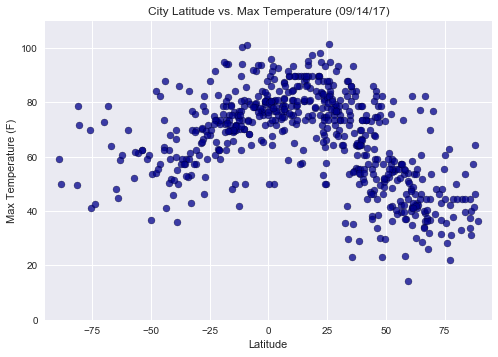

In [10]:
# Initialize plot + format the scatter
fig, ax = plt.subplots()
ax.scatter(lats, temps, alpha=0.75, facecolor="darkblue", edgecolors="black")

# Format and print the full plot
plt.title("City Latitude vs. Max Temperature (09/14/17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.xlim(-95,95)
plt.ylim(0,110)
plt.savefig("Resources/Latitude_MaxTemperature.png")
plt.show()

### Latitude vs. Humidity Plot

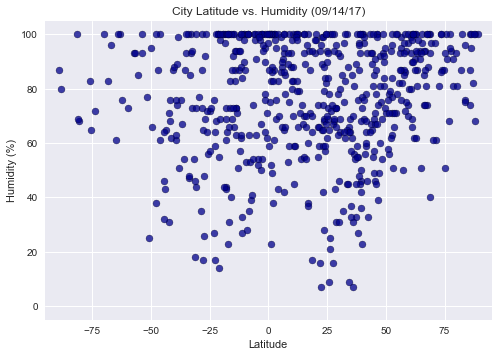

In [11]:
# Initialize plot + format the scatter
fig, ax = plt.subplots()
ax.scatter(lats, humids, alpha=0.75, facecolor="darkblue", edgecolors="black")

# Format and print the full plot
plt.title("City Latitude vs. Humidity (09/14/17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.xlim(-95,95)
plt.ylim(-5,105)
plt.savefig("Resources/Latitude_Humidity.png")
plt.show()

### Latitude vs. Cloudiness Plot

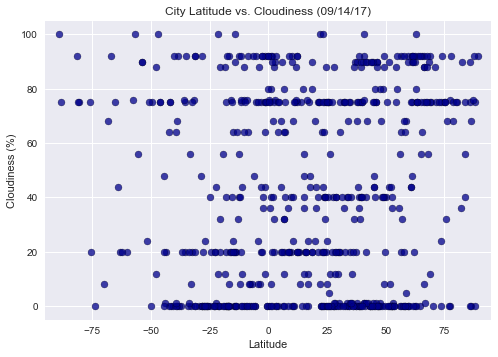

In [12]:
# Initialize plot + format the scatter
fig, ax = plt.subplots()
ax.scatter(lats, clouds, alpha=0.75, facecolor="darkblue", edgecolors="black")

# Format and print the full plot
plt.title("City Latitude vs. Cloudiness (09/14/17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.xlim(-95,95)
plt.ylim(-5,105)
plt.savefig("Resources/Latitude_Cloudiness.png")
plt.show()

### Latitude vs. Wind Speed Plot

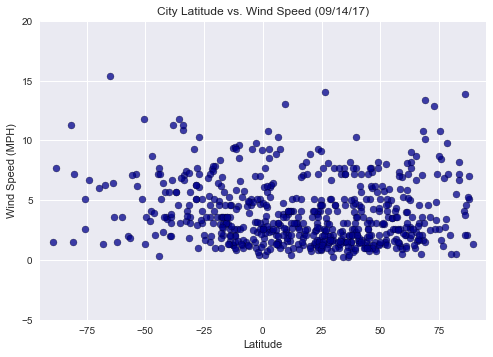

In [13]:
# Initialize plot + format the scatter
fig, ax = plt.subplots()
ax.scatter(lats, winds, alpha=0.75, facecolor="darkblue", edgecolors="black")

# Format and print the full plot
plt.title("City Latitude vs. Wind Speed (09/14/17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

plt.xlim(-95,95)
plt.ylim(-5,20)
plt.savefig("Resources/Latitude_WindSpeed.png")
plt.show()